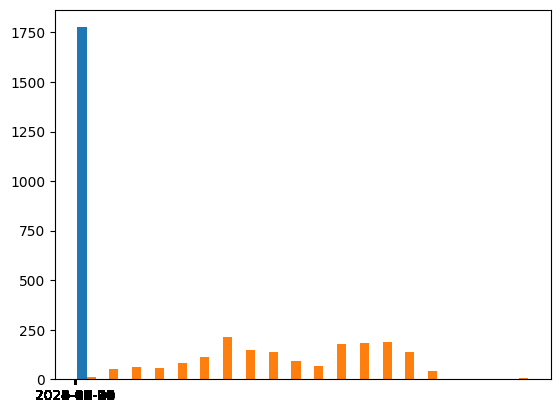

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

#Load data from the CSV file that only contains ridership data

data = pd.read_csv("/Users/leilastambuli/Documents/Portfolio-Project/combined_df.csv")
plt.hist(x = data, bins=10)
plt.show()